In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot

import sys, os
path2add = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)
    
from knunu import knunu_utils
from ksnunu import ksnunu_utils

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [2]:
files       = ['../knunu/knunu_model.json', '../ksnunu/ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [3]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

# for i in range(3, 19):
#     fixed[model.config.par_map[f'FFKs_decorrelated[{i}]']['slice']] = [True]

# for i in range(3, 8):
#     fixed[model.config.par_map[f'FFK_decorrelated[{i}]']['slice']] = [True]

pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    init_pars=best_fit.tolist(),
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 0.706574
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0182045
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0187037
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0190999


{'cvl': array([10.15213501,  0.08001453]),
 'cvr': array([3.85526329, 0.11039746]),
 'csl': array([3.20541556, 0.16789363]),
 'csr': array([0.93254436, 0.16393805]),
 'ctl': array([0.98944631, 0.01228002]),
 'FFK_decorrelated[0]': array([0.02040015, 0.74613678]),
 'FFK_decorrelated[1]': array([0.02962154, 0.67601805]),
 'FFK_decorrelated[2]': array([0.00863538, 0.40919993]),
 'FFK_decorrelated[3]': array([0.00231917, 0.96517254]),
 'FFK_decorrelated[4]': array([0.00468696, 0.8260354 ]),
 'FFK_decorrelated[5]': array([4.38267851e-04, 5.99281754e-01]),
 'FFK_decorrelated[6]': array([-0.00097945,  0.96624182]),
 'FFK_decorrelated[7]': array([0.00245909, 0.84618933]),
 'mu': array([1., 0.]),
 'stat': [[0.9968863978644812, 0.008211525966054234],
  [1.005989481444293, 0.006338094797345983],
  [0.9987558868398674, 0.005489139550636124],
  [0.9984233810753921, 0.005294190835559265],
  [0.9965349660815315, 0.0052525501956640075],
  [1.003609620425408, 0.005265733984044618],
  [1.001023938128485

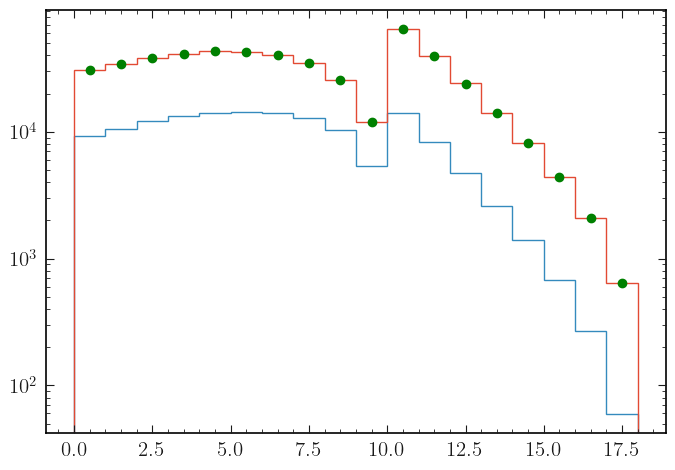

In [4]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 17.5, 18)
plt.plot(x, data[:18], 'og')
plt.yscale('log')